<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/fall_2025_iub/content/lessons/09_machine_learning_intro/09_workalong_machine_learning_basics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Work-along: Machine Learning Basics

This workalong walks through some of the basic elements of modern machine learning, including *rectified linear units (reLU)*, *loss functions*, *backpropagation*, and the use of `pytorch`.

```{note}
Download this notebook and place it in your lesson 09 folder.
```

<div style="max-width:720px"><div style="position:relative;padding-bottom:56.25%"><iframe id="kaltura_player" src='https://cdnapisec.kaltura.com/p/1751071/embedPlaykitJs/uiconf_id/55382703?iframeembed=true&amp;entry_id=1_mq40leww&amp;config%5Bprovider%5D=%7B%22widgetId%22%3A%221_2cr2ouqb%22%7D&amp;config%5Bplayback%5D=%7B%22startTime%22%3A0%7D'  allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" sandbox="allow-downloads allow-forms allow-same-origin allow-scripts allow-top-navigation allow-pointer-lock allow-popups allow-modals allow-orientation-lock allow-popups-to-escape-sandbox allow-presentation allow-top-navigation-by-user-activation" title="EAS-G 690 Lesson 09 - reLUs and manual optimization" style="position:absolute;top:0;left:0;width:100%;height:100%;border:0"></iframe></div></div>

*Use [this link](https://iu.mediaspace.kaltura.com/media/t/1_mq40leww) if you encounter issues with playing the embedded video above.*

## Rectified linear units (reLU)

In the cell below, implement two functions:
 1. `linear(x,w,b)`
 2. `relu(x)` 

as indicated in the functions' docstrings.  (Note, remove the lines with `pass` - this is just a line of code that says to Python "do nothing"...it's necessary because functions can't be empty in Python.)

Test that it works as expected, and keep your tests in the notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
""" Define a linear and relu function. """
def linear(x : np.ndarray, w : float = 1, b : float = 0) -> np.ndarray:
    """ returns w*x + b """
    return w*x + b

def relu(x : np.ndarray) -> np.ndarray:
    """ returns x if x is positive, 0 otherwise"""
    return np.maximum(x, 0)

In [3]:
""" Define a linear and relu function. """
def linear(x : np.ndarray, w : float = 1, b : float = 0) -> np.ndarray:
    """ returns w*x + b """
    return w*x + b

def relu(x : np.ndarray) -> np.ndarray:
    """ returns x if x is positive, 0 otherwise"""
    #if x > 0:
        #return x
    #else: 
        #return 0
    return np.maximum(x, 0)

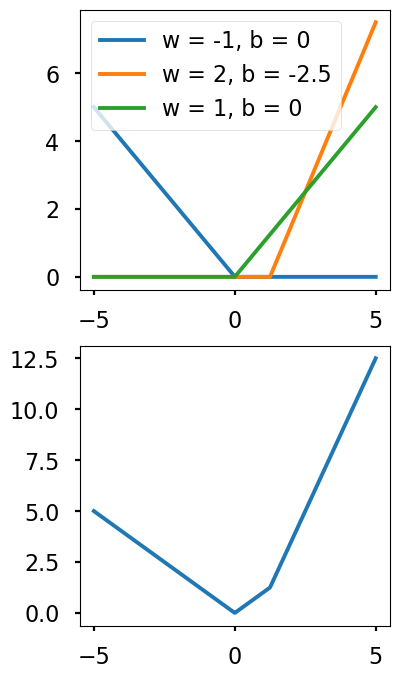

In [4]:
plt.style.use('seaborn-v0_8-poster')

""" Test the relu function. """
# Define the weights (slopes) and biases
w = [-1, 2, 1]
b = [0, -2.5, 0]

# Define x values for input
x = np.linspace(-5, 5, 1000)

fig, axs = plt.subplots(2,1, figsize = (4,8))

# show the individual relus
ax = axs[0]
for w_i, b_i in zip(w,b):
    ax.plot(x, relu(linear(x, w_i, b_i)), label = f"w = {w_i}, b = {b_i}")
ax.legend()

# show the sum of relus
ax = axs[1]
y = np.zeros_like(x)
for w_i, b_i in zip(w, b):
    # sum the relus
    y = y + relu(linear(x, w_i, b_i))
ax.plot(x, y)

plt.show()




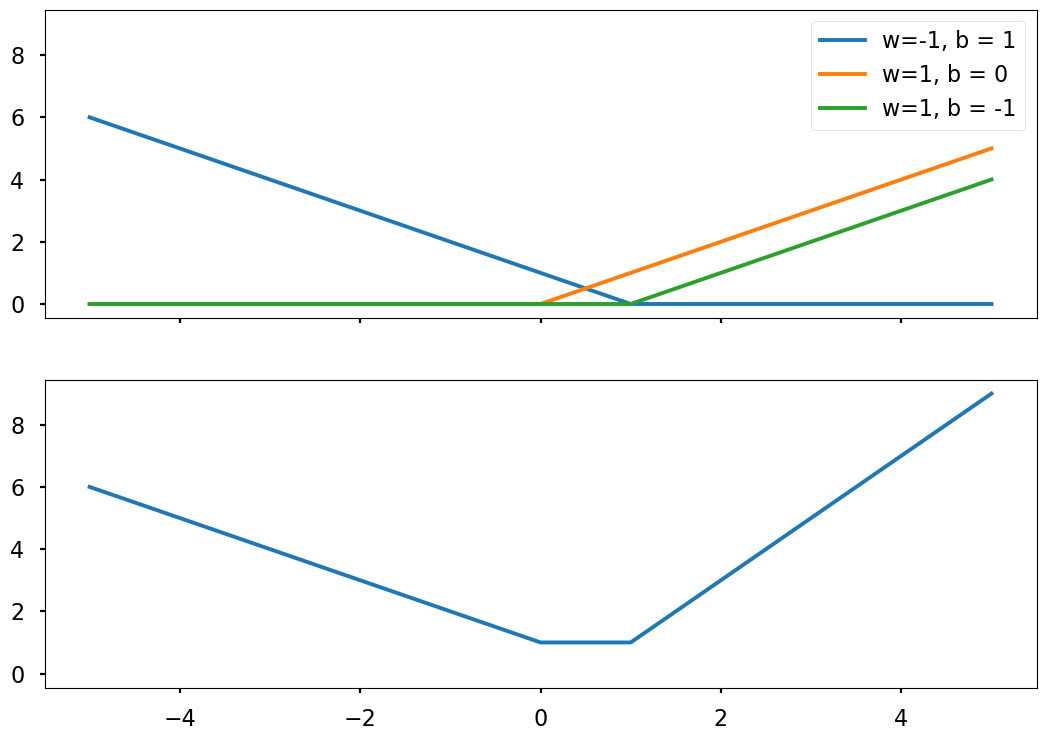

In [5]:
"""Video - Class"""
plt.style.use('seaborn-v0_8-poster')

""" Test the relu function. """

# define several slopes and biases
w = [-1, 1, 1]
b = [1, 0, -1]
# define x values for input
x = np.linspace(-5, 5, 1000)

# generate a two-panel figure
fig, axs = plt.subplots(2, 1, sharex = True, sharey = True)

# plot separate relus on the first plot
for w_i, b_i in zip(w, b):
    axs[0].plot(x, relu(linear(x, w_i, b_i)), label = f"w={w_i}, b = {b_i}")

# add a legend
axs[0].legend()

# sum the relus
y = None
for w_i, b_i in zip(w, b):
    if y is None:
        y = relu(linear(x, w_i, b_i))
    else:
        y = y + relu(linear(x, w_i, b_i))

# plot the sum of the relus on the second plot 
axs[1].plot(x, y)

# show the plot
plt.show()


## Fitting a function with reLUs

1. Run the cell below to create a graph of fake, noisy data (variable `noisy_data`).
1. In the cell below that, create a function `relu_sum` that is the sum of two reLUs with a bias (a scalar) added at the end
1. Create a new plot that includes the function output and the noisy data
1. Adjust the `w` and `b` parameters until the function approximates the fake data.
1. Comment in a markdown cell on your observations, what you learned, etc.



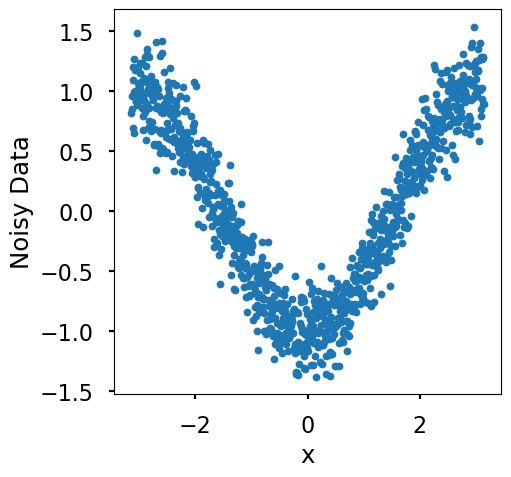

In [6]:
""" Create a fake, noisy dataset. """
import matplotlib.pyplot as plt

# define the x values
x = np.linspace(-np.pi, np.pi, 1000)

# define the y values of the true function
y_true = -np.cos(x)

# add some noise to the true function
np.random.seed(5984)
noisy_data = y_true + np.random.normal(0, 0.2, len(x))

# plot the noisy data
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(x, noisy_data, '.', label="data")
ax.set_xlabel("x")
ax.set_ylabel("Noisy Data")
plt.show()

In [7]:
"""Video-Class"""
""" Define a function that is the sum of two relus. """

def relu_sum(x : np.ndarray, w : np.ndarray, b : np.ndarray, bias : float = 0) -> np.ndarray:
    """ returns relu(w[0]*x + b[0]) + relu(w[1]*x + b[1]) + bias """
    # check that w and b hae the same shape 
    assert len(w) == len(b), "w and b must have the same shape"

    # sum the relus
    y = None
    for w_i, b_i in zip(w, b):
        if y is None:
            y = relu(linear(x, w_i, b_i))
        else:
            y = y + relu(linear(x, w_i, b_i))
    # add the bias
    y = y + bias

    return y


    
    




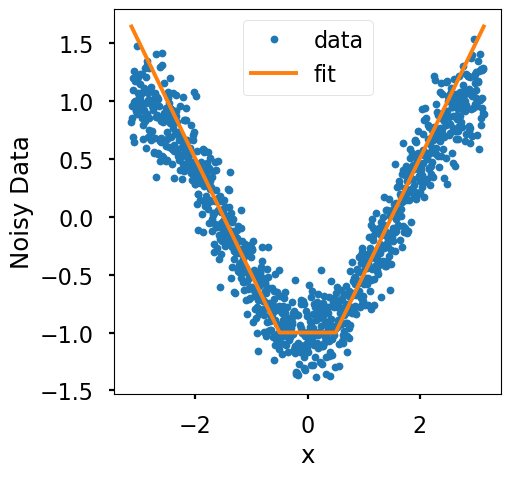

In [8]:
"""Video - Class"""
""" Plot the sum of two relus, with w, b such that the function fits the data. """

# set the weights and biases
w = [-1, 1]
b = [0.5, 0.5]
bias = -2

# plot the noisy data
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(x, noisy_data, '.', label="data")
ax.plot(x, relu_sum(x, w, b, bias), label="fit")
ax.set_xlabel("x")
ax.set_ylabel("Noisy Data")
ax.legend()
plt.show()

## Loss function

Now define a *loss* function $\mathcal{L}$: in this case *mean-squared error (MSE)* for the fit $\hat{\mathbf{z}}$ relative to the data $\mathbf{z}$

$$ \mathcal{L} = \frac{1}{N} \sum\limits_{i=0}^{N-1} (z_i - \hat{z}_i)^2$$

Calculate the loss for your fit to the data above: we'll compare in class.

In [9]:
"""Video - Class"""
""" Define a loss function. """

def loss(y_true: np.ndarray, y_pred : np.ndarray) -> float:
    """ returns the mean squared error between y_true and y_pred"""
    return np.mean((y_true - y_pred)**2)

# calculate the loss for the fit
loss(y_true = noisy_data, y_pred=relu_sum(x, w, b, bias))

np.float64(0.07324164958367582)

Add the loss to the title of the plot, and vary the parameters further to see if you can minimize the loss.

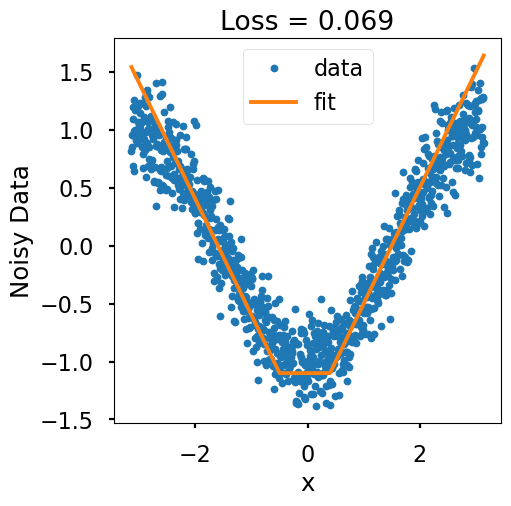

In [10]:
""" Vary parameters, minimizing the loss (include loss in title). """
# set the weights and biases
w = [-1, 1]
b = [0.4, 0.5]
bias = -2

# plot the noisy data
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(x, noisy_data, '.', label="data")
pred = relu_sum(x, w, b, bias) # run the model
ax.plot(x, pred, label="fit")
ax.set_xlabel("x")
ax.set_ylabel("Noisy Data")
ax.set_title(f"Loss = {loss(noisy_data, pred):2.3f}")
ax.legend()
plt.show()


## ReLUs in `pytorch`

```{note}
This section does not yet have a video recording.
```

Now we'll take advantage of `pytorch` for automating the process of fitting a NN model.

In [11]:
""" Define a neural network with a single hidden layer. """
# import pytorch
import torch
import torch.nn as nn
# set the random seed for reproducibility
torch.manual_seed(5984)

class MyNet(nn.Module):
    """ Implements a single-layer perceptron with ReLUS"""

    def __init__(self, n_relus : int = 2):
        # initialize the parent class
        super().__init__()

        # define the model
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, n_relus),
            nn.ReLU(), 
            nn.Linear(n_relus, 1)
        )

    def forward(self, x):
        """" Define the forward pass; how the network should act like a function. """
        out = self.linear_relu_stack(x)
        return out

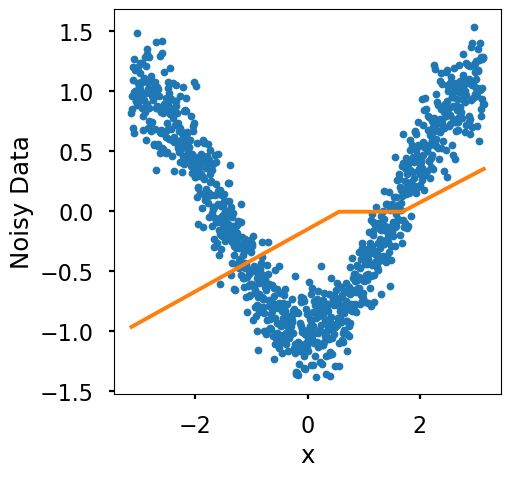

In [12]:
""" Show the initial model prediction/fit (it's bad)"""
# convert the x and y values to pytorch tensors
xt = torch.from_numpy(x).unsqueeze(1).to(torch.float32)
yt = torch.from_numpy(noisy_data).unsqueeze(1).to(torch.float32)

# instantiate a model
model_2 = MyNet(n_relus=2)

# run a prediction with the model
pred = model_2(xt)

# plot the noisy data and fit
# plot the noisy data
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(x, noisy_data, '.', label="data")
ax.plot(x, pred.detach().numpy(), label = "fit")
ax.set_xlabel("x")
ax.set_ylabel("Noisy Data")
plt.show()


In [13]:
model_2.parameters()

<generator object Module.parameters at 0x7f34b8933300>

In [23]:
for name, param in model_2.named_parameters():
    print(f"Parameter Name: {name}, Shape: {param.shape}")
    print(f"Parameter Data:(\n{param.data}\n")

Parameter Name: linear_relu_stack.0.weight, Shape: torch.Size([2, 1])
Parameter Data:(
tensor([[1.3894],
        [0.1105]])

Parameter Name: linear_relu_stack.0.bias, Shape: torch.Size([2])
Parameter Data:(
tensor([-1.7346, -0.4674])

Parameter Name: linear_relu_stack.2.weight, Shape: torch.Size([1, 2])
Parameter Data:(
tensor([[ 0.5642, -0.2116]])

Parameter Name: linear_relu_stack.2.bias, Shape: torch.Size([1])
Parameter Data:(
tensor([-0.2099])



### Training the model - the simple, but not-so-great way

We'll use a simple for loop to train the model on all the data.  This is bad because we don't split the dataset into train, test, and validation sets; this can make our efforts prone to overfitting.

But for simplicity, we'll forge forward with this (inadvisable) approach.

In [18]:
""" Train the model the bad way. """

# set the hyperparameters
learning_rate = 0.01

# Define the loss function
loss_fn = nn.MSELoss()
training_steps = 1000

# define the optimizer
optim = torch.optim.Adam(model_2.parameters(), lr = learning_rate)

# loop over training steps
for n in range(training_steps):

    # calculate the prediction
    pred = model_2(xt)

    # calculate the loss
    loss = loss_fn(pred, yt)

    # zero the gradients
    optim.zero_grad()

    # calculate the gradients of the parameters wrt the loss 
    loss.backward()

    # have the optimizer update the parameters
    optim.step()

    # print the loss every 100 steps
    if n % 100 == 0:
        print(f"Step {n}: {loss.item():.3f}")




Step 0: 0.387
Step 100: 0.387
Step 200: 0.387
Step 300: 0.387
Step 400: 0.387
Step 500: 0.387
Step 600: 0.387
Step 700: 0.387
Step 800: 0.387
Step 900: 0.387


In [24]:
""" Train the model the bad way. """
# set hyperparameters
learning_rate = 0.01
training_steps = 1000

# define the model (and set the random number generator seed for reproducubility)
torch.manual_seed(5894)
model_2 = MyNet(n_relus = 2)

# define the loss function
loss_fn = nn.MSELoss()

# define an optimizer
optim = torch.optim.Adam(model_2.parameters(), lr = learning_rate)
# do an optimization loop 
for n in range(training_steps):
    
    #calculate the prediction (run the model)
    pred = model_2(xt)

    # calculate the loss (pred is the prediction, yt is the tensor version of the training data)
    loss = loss_fn(pred, yt)

    # zero the gradients
    optim.zero_grad()

    # calculate the gradients of the parameter wrt loss
    loss.backward()

    # update the parameters (hopefully improve!)
    optim.step()

    # print the loss every 100 steps
    if n % 100 == 0:
        print(f"Step{n}: {loss.item():.3f}")
    



Step0: 1.137
Step100: 0.446
Step200: 0.403
Step300: 0.390
Step400: 0.387
Step500: 0.387
Step600: 0.387
Step700: 0.387
Step800: 0.387
Step900: 0.387


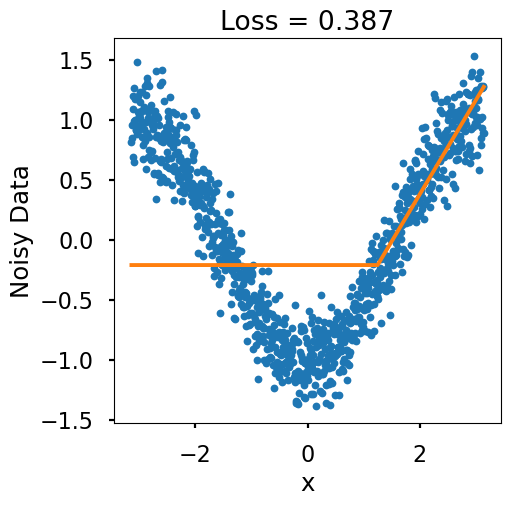

In [25]:
""" Plot the trained model. """

# run a prediction with the model 
pred = model_2(xt)

loss = loss_fn(pred, yt).item()

# plot the noisy data and fit 
# plot the noisy data
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(x, noisy_data, '.', label="data")
ax.plot(x, pred.detach().numpy(),label='fit')
ax.set_title(f"Loss = {loss:.3f}")
ax.set_xlabel("x")
ax.set_ylabel("Noisy Data")
plt.show()


### Training the model - the better, but more complicated way

We'll follow standard practice here to split the data into test, train and validation sets.  We'll also use pytorch's data loader to do training in batches, and we'll put our training loop into a function.  This will allow us to train in *epochs* (passes through the entire dataset).

In [44]:
"""Video Travis"""
""" Train the model the better, but more complicated way. """
# set hyperparameters
n_relus = 2
learning_rate = 0.01
training_fraction = 0.7
test_fraction = 0.2
batch_size = 100
num_epochs = 100
valid_fraction = 1 - (training_fraction + test_fraction)

# check that training, test, and validation fractions add up
assert valid_fraction > 0, "Validation fraction is negative; check the training_fraction and test_fraction"

# define the model
# (and set the random number generator seed for reproducibility)
torch.manual_seed(5895)
model_2 = MyNet(n_relus = n_relus)

# define the optimizer
optim = torch.optim.Adam(model_2.parameters(), lr = learning_rate)

# define the loss function
loss_fn = nn.MSELoss()

#***********************************************
# define the test, training, and validation sets
#***********************************************
# generate a shufffled set of indices
random_inds = np.random.choice(len(x), len(x), replace = False)
# generate the training dataset
train_ind_max = int(training_fraction * len(x))
train_inds = random_inds[0:train_ind_max]
x_train = xt[train_inds]
y_train = yt[train_inds]

# generate the test dataset
test_ind_max = train_ind_max + int(test_fraction * len(x))
test_inds = random_inds[train_ind_max:test_ind_max]
x_test = xt[test_inds]
y_test = yt[test_inds]

# generate the validation dataset
valid_inds = random_inds[test_ind_max:]
x_valid = xt[valid_inds]
y_valid = yt[valid_inds]

# print the lenghts of the datasets
print(f"len(x_train) = {len(x_train)}, len(x_test) = {len(x_test)}, len(x_valid) = {len(x_valid)}")
print(f"len(y_train) = {len(y_train)}, len(y_test) = {len(y_test)}, len(y_valid) = {len(y_valid)}")

# define data loaders for the test, training, and validation datasets
from torch.utils.data import TensorDataset, DataLoader
train_ds = TensorDataset(x_train, y_train)
test_ds = TensorDataset(x_test, y_test)
valid_ds = TensorDataset(x_valid, y_valid)
train_dl = DataLoader(train_ds, batch_size = batch_size, shuffle=True)
test_dl = DataLoader(test_ds, batch_size = batch_size, shuffle=False)
valid_dl = DataLoader(valid_ds, batch_size = batch_size, shuffle=False)

# define a training loop function
def train_loop(data_loader, model, loss_fn, optim):
    """ Run an epoch of training. """
    # set the model to training model
    model.train()

    # initialize the loss for each batch
    batch_loss = []

    # loop over the batches
    for batch, (xx, yy) in enumerate(data_loader):

        # calculate the prediction (run the model)
        pred = model(xx)

        # calculate the loss (pred is the prediction, yt is the tensor version of the training data)
        loss = loss_fn(pred, yy)

        # zero the gradients
        optim.zero_grad()

        # calculate the gradients of the parameter wrt loss
        loss.backward()

        #update the parameters (hopefully improve!)
        optim.step()
        
        # save the loss
        batch_loss.append(loss.item())
    
    # return the average loss cross
    return np.mean(batch_loss)

# define a testing loop function
def test_loop(data_loader, model, loss_fn):
    """Evaluate the model on test data. """
    # put the model in evaluate mode
    model.eval()

    # initialize the loss
    batch_loss = []

    # have torch not do gradient calculations
    with torch.no_grad():
        # loop over batches
        for batch, (xx, yy) in enumerate(data_loader):

            # calculate the prediction
            pred = model(xx)

            # calculate the loss
            loss = loss_fn(pred, yy)

            # save the loss
            batch_loss.append(loss.item())

    # return the average loss across batches
    return np.mean(batch_loss)



len(x_train) = 700, len(x_test) = 200, len(x_valid) = 100
len(y_train) = 700, len(y_test) = 200, len(y_valid) = 100


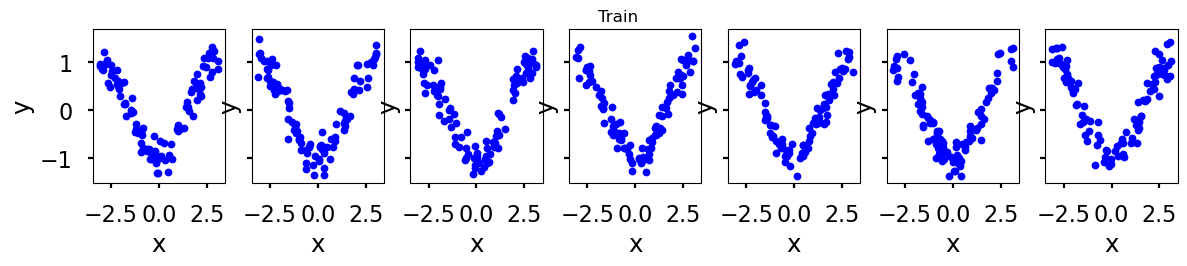

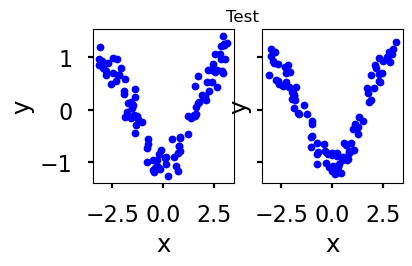

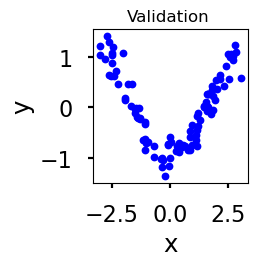

In [45]:
def visualize_loader(data_loader, title = None):
    N = len(data_loader)
    fig, axs = plt.subplots(1, N, sharex = True, sharey = True, figsize = (2*N, 2))

    # loop over batches
    for i, (xx, yy) in enumerate(data_loader):
        #select the axis
        try:
            ax = axs[i]
        except TypeError:
            ax=axs
        # plot the bacth
        ax.plot(xx.detach().numpy(), yy.detach().numpy(), 'b.')
        # label axes
        ax.set_xlabel("x")
        ax.set_ylabel("y")
    
    fig.suptitle(title)
    # show the plot
    plt.show()

visualize_loader(train_dl, "Train")
visualize_loader(test_dl, "Test")
visualize_loader(valid_dl, "Validation")


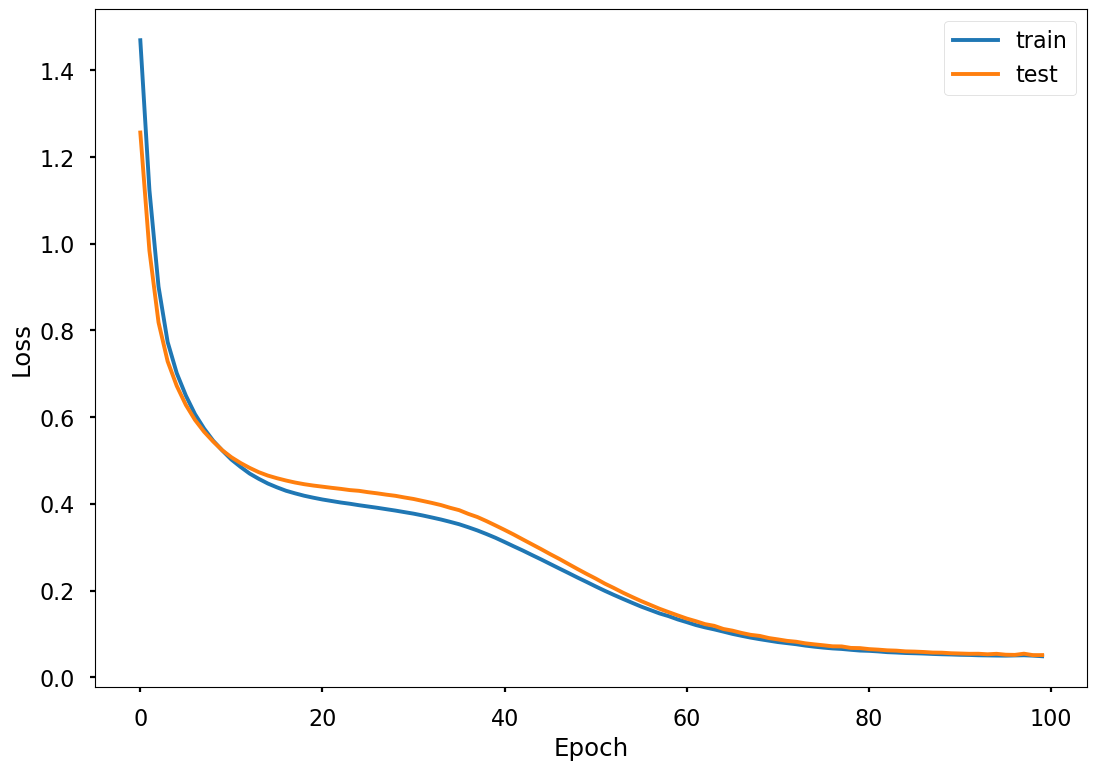

In [46]:
# ***********************************************
# train the model
# ***********************************************

train_loss = []
test_loss = []

# loop over epochs
for epoch in range(num_epochs):

    # run a training loop
    train_loss_tmp = train_loop(train_dl, model_2, loss_fn, optim)
    train_loss.append(train_loss_tmp)

    # run a testing loop
    test_loss_tmp = test_loop(test_dl, model_2, loss_fn)
    test_loss.append(test_loss_tmp)

# plot the training and test loss
fig, ax = plt.subplots()
ax.plot(train_loss, label = "train")
ax.plot(test_loss, label = "test")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.legend()
plt.show()

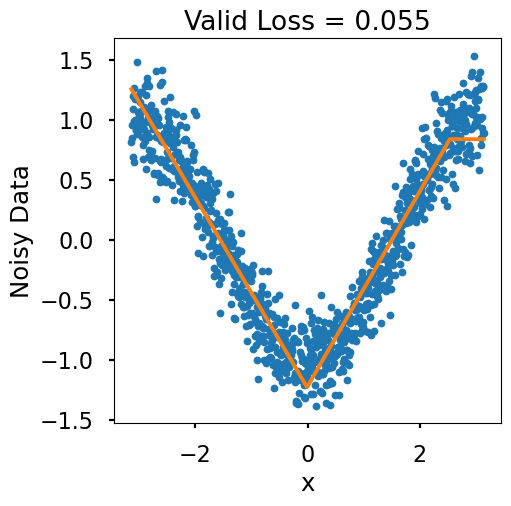

In [47]:
""" Plot the prediction """
valid_loss = test_loop(valid_dl, model_2, loss_fn)
pred = model_2(xt)

# plot the original data and the model fit (it'll be bad)
# plot the noisy data
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(x, noisy_data, '.', label= 'data')
# Note: detach().numpy() is required for plotting a pytorch tensor
ax.plot(x, pred.detach().numpy(), label = 'fit')
ax.set_xlabel("x")
ax.set_ylabel("Noisy Data")
loss = loss_fn(pred, yt)
ax.set_title(f'Valid Loss = {valid_loss.item():.3f}')
plt.show()

In [36]:
""" Train the model the better, but more complicated way. """

# set hyperparameters
learning_rate = 0.01
training_steps = 1000
training_fraction = 0.7
test_fraction = 0.2
valid_fraction = 1 - (training_fraction -test_fraction)
batch_size = 100
num_epochs = 100
assert valid_fraction > 0, "Choose different values for test_fraction and training_fraction; valid_fraction is"

# define the model (and set the random number generator seed for reproducibility)
torch.manual_seed(5895)
model_2 = MyNet(n_relus = 10000)

# define the loss function
loss_fn = nn.MSELoss()

# define the optimizer
optim = torch.optim.Adam(model_2.parameters(), lr = learning_rate)

#***********************************************
# define the test, training, and validation sets
#***********************************************

# create random indicies
i_random = np.random.choice(len(x), len(x), replace = False)
train_ind_max = int(len(x)*training_fraction)
train_inds = i_random[0:train_ind_max]
# define indices for testing data
test_ind_max = train_ind_max + int(len(x)*test_fraction)
test_inds = i_random[train_ind_max:test_ind_max]
# for validation data
valid_inds = i_random[test_ind_max:]
print(f"training: {len(train_inds)}, test: {len(test_inds)}, valid: {len(valid_inds)}")

# define data loaders for the test, training, and validation datasets
from torch.utils.data import TensorDataset, DataLoader
#define a training loop
train_ds = TensorDataset(xt[train_inds], yt[train_inds])
test_ds = TensorDataset(xt[test_inds], yt[test_inds])
valid_ds = TensorDataset(xt[valid_inds], yt[valid_inds])
#
train_dl = DataLoader(train_ds, batch_size = batch_size, shuffle = True)
test_dl = DataLoader(test_ds, batch_size = batch_size, shuffle = True)
valid_dl = DataLoader(valid_ds, batch_size = batch_size, shuffle = True)

#define a training loop
# define an optimizer
def train_loop(data_loader, model, loss_fn, optim):
    # put the model into training mode
    model.train()

    # initialize the loss list
    batch_loss = []
    
    # do an optimization loop 
    # for n in range(training_steps):
    for bach, (xx, yy) in enumerate(data_loader):  

        # Changes:
        # * xt -> xx
        # * yt -> yy
        # * model_2 -> model   
    
        #calculate the prediction (run the model)
        pred = model_2(xx)

        # calculate the loss (pred is the prediction, yt is the tensor version of the training data)
        loss = loss_fn(pred, yy)

        # zero the gradients
        optim.zero_grad()

        # calculate the gradients of the parameter wrt loss
        loss.backward()

        # update the parameters (hopefully improve!)
        optim.step()

        # store the loss
        batch_loss.append(loss.item())
       
    # return the average loss
    return np.mean(batch_loss)

# define a testing loop 
def test_loop(data_loader, model, loss_fn):
    # put the model in avaluation mode
    model.eval()

    # initialize the loss list
    batch_loss = []

    # turn off gradient calculation
    with torch.no_grad():
        # loop over batches
        for batch, (xx, yy) in enumerate(data_loader):

            #run the model
            pred = model(xx)

            #calculate the loss
            loss = loss_fn(pred, yy)

            #store the loss
            batch_loss.append(loss.item())

    #return the average loss
    return np.mean(batch_loss)

test_loop(test_dl, model_2, loss_fn)


    

training: 700, test: 200, valid: 100


np.float64(2.3650710582733154)

In [ ]:
""" Train the model. """

# initialize list to store the losses
train_loss = []
test_loss = []

# start from a fresh model
torch.manual_seed(5889)
model_2

# loop over epochs
for epoch in range(num_epochs):
    # run a training a loop
    train_loss_tmp = test_loop(train_dl, model_2, loss_fn, optim)

    # run a testing loop
    test_loss_tmp = test_loop(train_dl, model_2, loss_fn)

    #store the loss
    train_loss.append(train_loss_tmp)
    test_loss. append(test_loss_tmp)

#plot the losses as a function of epoch
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(x, noisy_data, '.', label='data')
ax.plot

In [28]:
len(xt)

100

In [18]:
""" Plot the prediction """
len(train_dl)

1

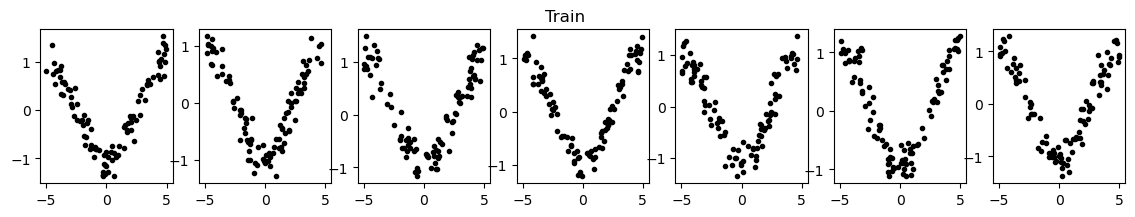

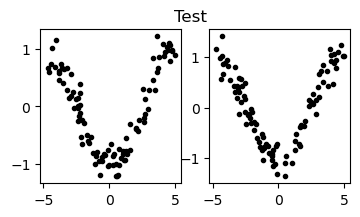

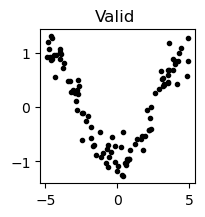

In [35]:
#data_load = train_dl
def visualize_dataloader(data_loader, tittle = None):
    N = len(data_loader)

    #create a 1xN figure
    fig, axs = plt.subplots(1, N, sharex = True,figsize = (2*N, 2))

    #Loop over batches & plot
    for i, (xx, yy) in enumerate(data_loader):
    #set the plot axis
        try:
            ax = axs[i]
        except TypeError:
            ax = axs
        ax.plot(xx, yy, 'k.')

    #add the tittle
    fig.suptitle(tittle)
    plt.show()

visualize_dataloader(train_dl, "Train")
visualize_dataloader(test_dl, "Test")
visualize_dataloader(valid_dl, "Valid")

# Exercise in Class - use own dataset

In [38]:
elev = np.array([1824, 1826, 1858, 1881, 1844, 1900 ,1930, 1967, 
                     1974, 2011, 2021, 2046, 2076, 2101, 2131,2174
                     ])

press = np.array([29.22,29.22, 29.21, 29.21, 29.21, 29.21, 29.21, 
                     29.2, 29.19, 29.18, 29.17, 29.16, 29.15, 29.15, 29.14, 29.14
                     ])


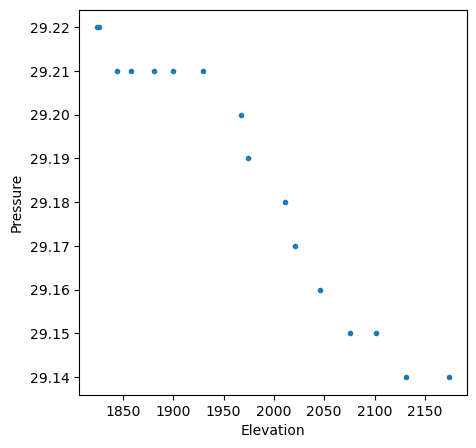

In [39]:
""" Create a fake, noisy dataset. """
import matplotlib.pyplot as plt


# plot the noisy data
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(elev, press, '.', label="data")
ax.set_xlabel("Elevation")
ax.set_ylabel("Pressure")
plt.show()

In [40]:
# convert x and y to pytorch tensors
# unsqueeze - converts x froo 1D to 2D
# to - converts x from type double (64 bit) to float (32 bit)
elevt = torch.from_numpy(elev).to(torch.float32).unsqueeze(1)
presst = torch.from_numpy(press).to(torch.float32).unsqueeze(1)

# instantiate the model
model_2 = MyNet(n_relus=2)

# run the model (make a prediction)
pred = model_2(elevt)

In [41]:
""" Train the model the better, but more complicated way. """

# set hyperparameters
learning_rate = 0.01
training_steps = 16
training_fraction = 0.625
test_fraction = 0.25
valid_fraction = 1 - (training_fraction -test_fraction)
batch_size = 1
num_epochs = 1
assert valid_fraction > 0, "Choose different values for test_fraction and training_fraction; valid_fraction is"

# define the model (and set the random number generator seed for reproducibility)
torch.manual_seed(5895)
model_2 = MyNet(n_relus = 10000)

# define the loss function
loss_fn = nn.MSELoss()

# define the optimizer
optim = torch.optim.Adam(model_2.parameters(), lr = learning_rate)

#***********************************************
# define the test, training, and validation sets
#***********************************************

# create random indicies
i_random = np.random.choice(len(elev), len(elev), replace = False)
train_ind_max = int(len(elev)*training_fraction)
train_inds = i_random[0:train_ind_max]
# define indices for testing data
test_ind_max = train_ind_max + int(len(elev)*test_fraction)
test_inds = i_random[train_ind_max:test_ind_max]
# for validation data
valid_inds = i_random[test_ind_max:]
print(f"training: {len(train_inds)}, test: {len(test_inds)}, valid: {len(valid_inds)}")

# define data loaders for the test, training, and validation datasets
from torch.utils.data import TensorDataset, DataLoader
#define a training loop
train_ds = TensorDataset(elevt[train_inds], presst[train_inds])
test_ds = TensorDataset(elevt[test_inds], presst[test_inds])
valid_ds = TensorDataset(elevt[valid_inds], presst[valid_inds])
#
train_dl = DataLoader(train_ds, batch_size = batch_size, shuffle = True)
test_dl = DataLoader(test_ds, batch_size = batch_size, shuffle = True)
valid_dl = DataLoader(valid_ds, batch_size = batch_size, shuffle = True)

#define a training loop
# define an optimizer
def train_loop(data_loader, model, loss_fn, optim):
    # put the model into training mode
    model.train()

    # initialize the loss list
    batch_loss = []
    
    # do an optimization loop 
    # for n in range(training_steps):
    for bach, (xx, yy) in enumerate(data_loader):  

        # Changes:
        # * xt -> xx
        # * yt -> yy
        # * model_2 -> model   
    
        #calculate the prediction (run the model)
        pred = model_2(xx)

        # calculate the loss (pred is the prediction, yt is the tensor version of the training data)
        loss = loss_fn(pred, yy)

        # zero the gradients
        optim.zero_grad()

        # calculate the gradients of the parameter wrt loss
        loss.backward()

        # update the parameters (hopefully improve!)
        optim.step()

        # store the loss
        batch_loss.append(loss.item())
       
    # return the average loss
    return np.mean(batch_loss)

# define a testing loop 
def test_loop(data_loader, model, loss_fn):
    # put the model in avaluation mode
    model.eval()

    # initialize the loss list
    batch_loss = []

    # turn off gradient calculation
    with torch.no_grad():
        # loop over batches
        for batch, (xx, yy) in enumerate(data_loader):

            #run the model
            pred = model(xx)

            #calculate the loss
            loss = loss_fn(pred, yy)

            #store the loss
            batch_loss.append(loss.item())

    #return the average loss
    return np.mean(batch_loss)

test_loop(test_dl, model_2, loss_fn)

training: 10, test: 4, valid: 2


np.float64(546721.90625)

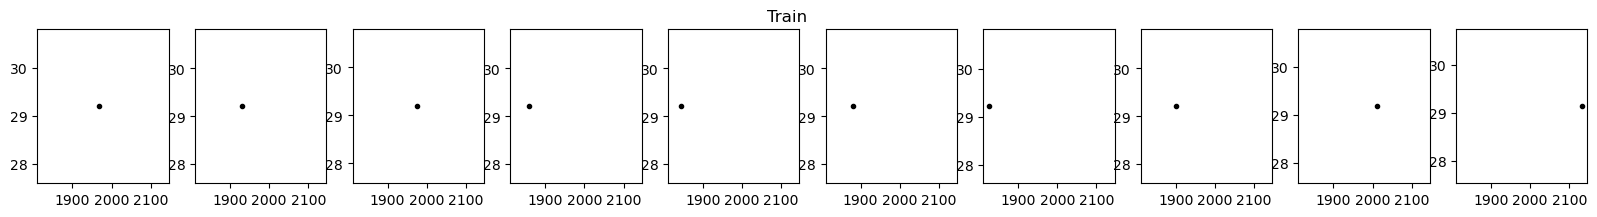

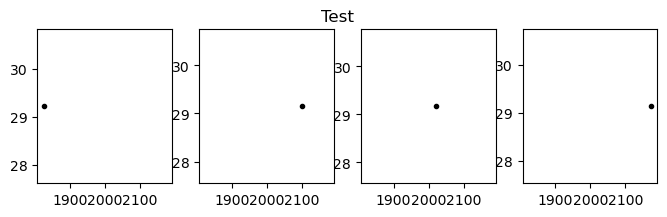

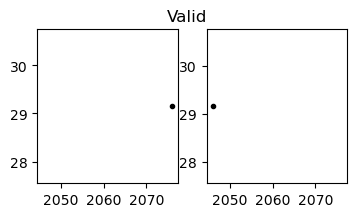

In [44]:
#data_load = train_dl
def visualize_dataloader(data_loader, tittle = None):
    N = len(data_loader)

    #create a 1xN figure
    fig, axs = plt.subplots(1, N, sharex = True,figsize = (2*N, 2))

    #Loop over batches & plot
    for i, (xx, yy) in enumerate(data_loader):
    #set the plot axis
        try:
            ax = axs[i]
        except TypeError:
            ax = axs
        ax.plot(xx, yy, 'k.')

    #add the tittle
    fig.suptitle(tittle)
    plt.show()

visualize_dataloader(train_dl, "Train")
visualize_dataloader(test_dl, "Test")
visualize_dataloader(valid_dl, "Valid")

# Homework
. There is a csv file named 'WEATHER_-_2414781_Sep_15_2023_2_56_14_PM.csv' in the current directory. 

. From this file, extract the numbers from the columns named 'Barometric Pressure' and 'Altitude'.

. The Barometric Pressure numbers span column E, rows 6-41. Altitude is column F, rows 6-41.

In [48]:
#There is a csv file named 'WEATHER_-_2414781_Sep_15_2023_2_56_14_PM.csv' in the current directory. 
#From this file, extract the numbers from the columns named 'Barometric Pressure' and 'Altitude'.
#The Barometric Pressure numbers span column E, rows 6-41. Altitude is column F, rows 6-41.

import pandas as pd

csv_path = 'WEATHER_-_2414781_Sep_15_2023_2_56_14_PM.csv'

# Many exported CSVs contain metadata rows before the actual header.
# Try to read the file robustly: first attempt to treat row 5 (index 4) as header.
# If that fails, read without a header and pick columns E (index 4) and F (index 5) from rows 6-41.
try:
	df_values = pd.read_csv(csv_path, engine='python', header=4, usecols=['Barometric Pressure', 'Altitude'])
except Exception:
	# fallback: no reliable header, read rows 6-41 (skip first 5 rows), take columns 4 and 5 (E,F)
	df_values = pd.read_csv(
		csv_path,
		engine='python',
		header=None,
		skiprows=5,        # skip first 5 rows so row 6 becomes first row read
		usecols=[4, 5],    # columns E (index 4) and F (index 5)
		nrows=36           # rows 6-41 inclusive => 36 rows
	)
	df_values.columns = ['Barometric Pressure', 'Altitude']
# Convert values to numeric, stripping any non-numeric characters (units, commas, etc.)
df_values['Barometric Pressure'] = pd.to_numeric(
	df_values['Barometric Pressure'].astype(str).str.replace(r'[^0-9\.\+\-eE]', '', regex=True),
	errors='coerce'
)
df_values['Altitude'] = pd.to_numeric(
	df_values['Altitude'].astype(str).str.replace(r'[^0-9\.\+\-eE]', '', regex=True),
	errors='coerce'
)

# Drop missing rows and reset index
df_values = df_values.dropna().reset_index(drop=True)

# final series
barometric_pressure = df_values['Barometric Pressure']
altitude = df_values['Altitude']

# Assign to Barometric Pressure and Altitude values to lists
barometric_pressure_list = barometric_pressure.tolist()
altitude_list = altitude.tolist()

In [49]:
elev = np.array(altitude_list)

press = np.array(barometric_pressure_list)

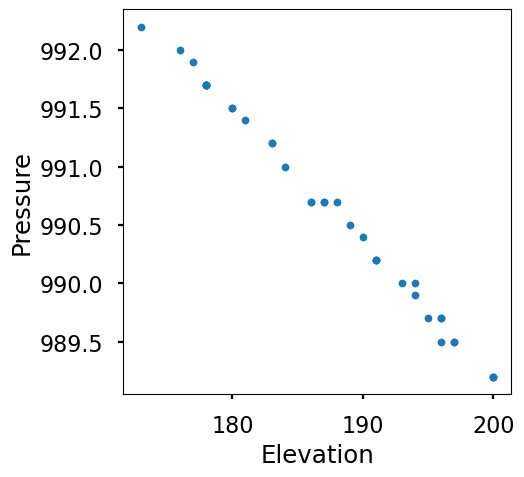

In [50]:
""" Create a fake, noisy dataset. """
import matplotlib.pyplot as plt


# plot the noisy data
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(elev, press, '.', label="data")
ax.set_xlabel("Elevation")
ax.set_ylabel("Pressure")
plt.show()

In [51]:
# convert x and y to pytorch tensors
# unsqueeze - converts x froo 1D to 2D
# to - converts x from type double (64 bit) to float (32 bit)
elevt = torch.from_numpy(elev).to(torch.float32).unsqueeze(1)
presst = torch.from_numpy(press).to(torch.float32).unsqueeze(1)

# instantiate the model
model_2 = MyNet(n_relus=2)

# run the model (make a prediction)
pred = model_2(elevt)

In [52]:
""" Train the model the better, but more complicated way. """

# set hyperparameters
learning_rate = 0.01
training_steps = 16
training_fraction = 0.625
test_fraction = 0.25
valid_fraction = 1 - (training_fraction -test_fraction)
batch_size = 2
num_epochs = 2
assert valid_fraction > 0, "Choose different values for test_fraction and training_fraction; valid_fraction is"

# define the model (and set the random number generator seed for reproducibility)
torch.manual_seed(5895)
model_2 = MyNet(n_relus = 10000)

# define the loss function
loss_fn = nn.MSELoss()

# define the optimizer
optim = torch.optim.Adam(model_2.parameters(), lr = learning_rate)

#***********************************************
# define the test, training, and validation sets
#***********************************************

# create random indicies
i_random = np.random.choice(len(elev), len(elev), replace = False)
train_ind_max = int(len(elev)*training_fraction)
train_inds = i_random[0:train_ind_max]
# define indices for testing data
test_ind_max = train_ind_max + int(len(elev)*test_fraction)
test_inds = i_random[train_ind_max:test_ind_max]
# for validation data
valid_inds = i_random[test_ind_max:]
print(f"training: {len(train_inds)}, test: {len(test_inds)}, valid: {len(valid_inds)}")

# define data loaders for the test, training, and validation datasets
from torch.utils.data import TensorDataset, DataLoader
#define a training loop
train_ds = TensorDataset(elevt[train_inds], presst[train_inds])
test_ds = TensorDataset(elevt[test_inds], presst[test_inds])
valid_ds = TensorDataset(elevt[valid_inds], presst[valid_inds])
#
train_dl = DataLoader(train_ds, batch_size = batch_size, shuffle = True)
test_dl = DataLoader(test_ds, batch_size = batch_size, shuffle = True)
valid_dl = DataLoader(valid_ds, batch_size = batch_size, shuffle = True)

#define a training loop
# define an optimizer
def train_loop(data_loader, model, loss_fn, optim):
    # put the model into training mode
    model.train()

    # initialize the loss list
    batch_loss = []
    
    # do an optimization loop 
    # for n in range(training_steps):
    for bach, (xx, yy) in enumerate(data_loader):  

        # Changes:
        # * xt -> xx
        # * yt -> yy
        # * model_2 -> model   
    
        #calculate the prediction (run the model)
        pred = model_2(xx)

        # calculate the loss (pred is the prediction, yt is the tensor version of the training data)
        loss = loss_fn(pred, yy)

        # zero the gradients
        optim.zero_grad()

        # calculate the gradients of the parameter wrt loss
        loss.backward()

        # update the parameters (hopefully improve!)
        optim.step()

        # store the loss
        batch_loss.append(loss.item())
       
    # return the average loss
    return np.mean(batch_loss)

# define a testing loop 
def test_loop(data_loader, model, loss_fn):
    # put the model in avaluation mode
    model.eval()

    # initialize the loss list
    batch_loss = []

    # turn off gradient calculation
    with torch.no_grad():
        # loop over batches
        for batch, (xx, yy) in enumerate(data_loader):

            #run the model
            pred = model(xx)

            #calculate the loss
            loss = loss_fn(pred, yy)

            #store the loss
            batch_loss.append(loss.item())

    #return the average loss
    return np.mean(batch_loss)

test_loop(test_dl, model_2, loss_fn)

training: 22, test: 9, valid: 5


np.float64(1117550.8)

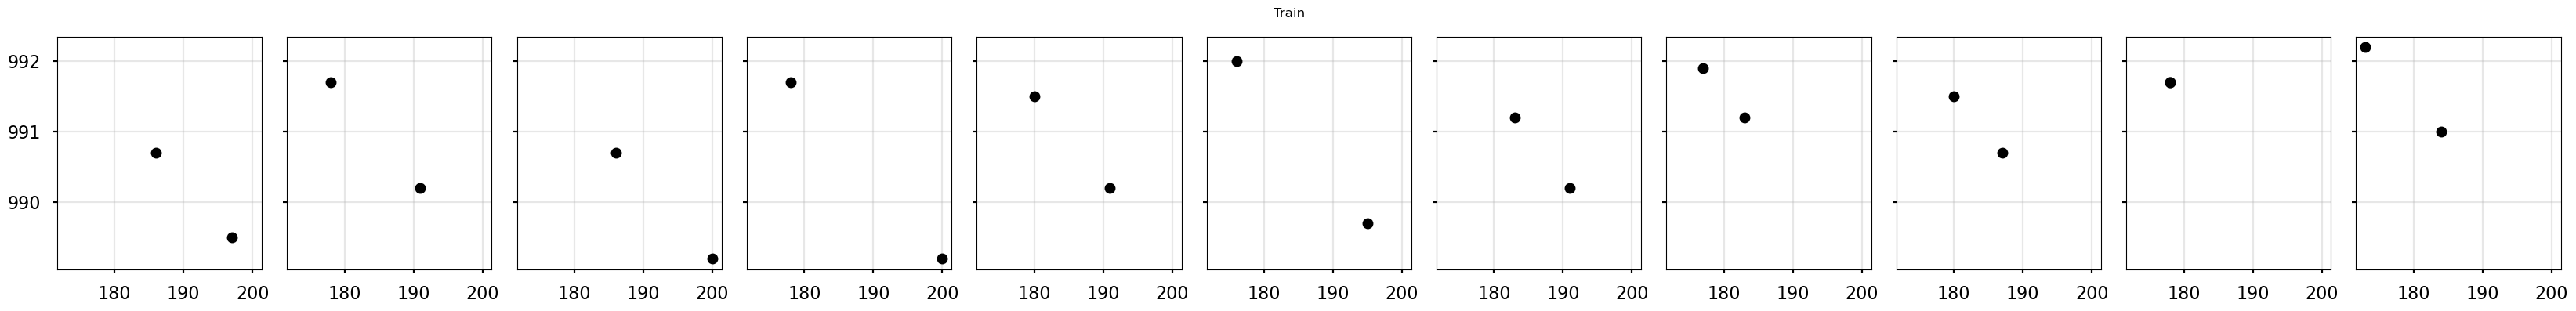

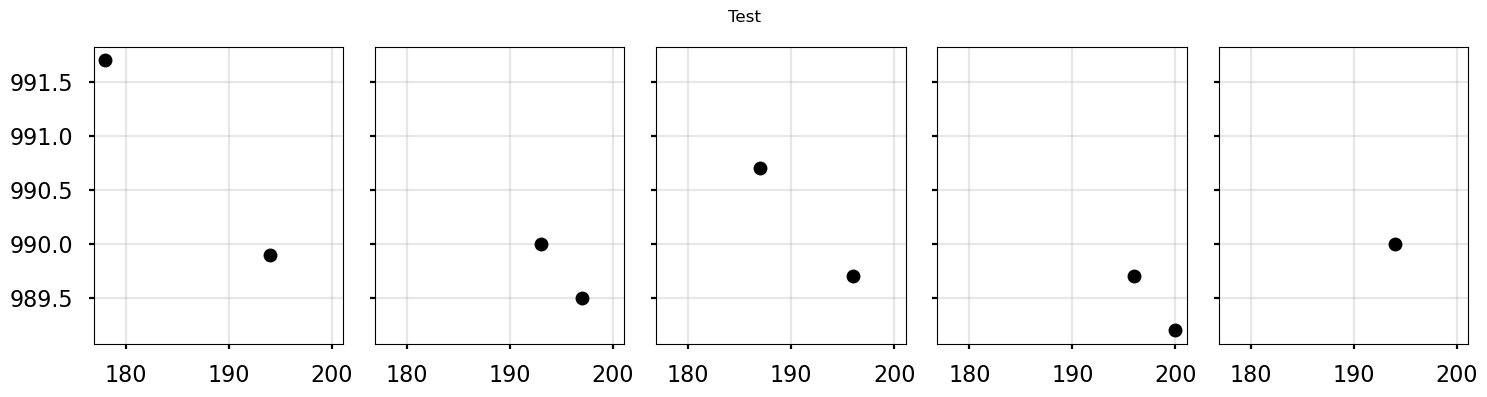

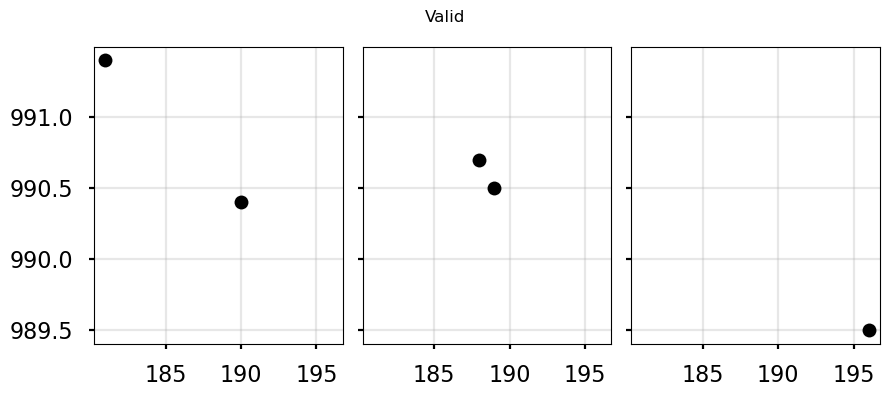

In [58]:
def visualize_dataloader(data_loader, tittle=None):
    N = len(data_loader)
    # create a 1xN figure (aumentar o tamanho)
    fig, axs = plt.subplots(1, N, sharex=True, sharey=True, figsize=(3*N, 4))
    
    # Loop over batches & plot
    for i, (xx, yy) in enumerate(data_loader):
        # set the plot axis
        try:
            ax = axs[i]
        except TypeError:
            ax = axs
        
        ax.plot(xx, yy, 'ko', markersize=10)  # 'ko' = círculos pretos maiores
        ax.grid(True, alpha=0.3)  # adicionar grid
    
    # add the tittle
    fig.suptitle(tittle)
    plt.tight_layout()
    plt.show()

visualize_dataloader(train_dl, "Train")
visualize_dataloader(test_dl, "Test")
visualize_dataloader(valid_dl, "Valid")

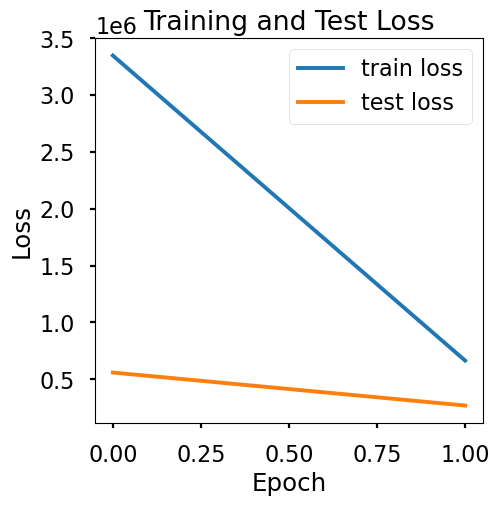

In [55]:
""" THomas the Tank Engine the Model """

# initialize lists to store the losses
train_loss = []
test_loss = []

# loop oer epochs
for epoch in range(num_epochs):

    # run a training loop
    train_loss_tmp = train_loop(train_dl, model_2, loss_fn, optim)
    
    # run a testing loop
    test_loss_tmp = test_loop(train_dl, model_2, loss_fn)
    
    #store the loss
    train_loss.append(train_loss_tmp)
    test_loss.append(test_loss_tmp)
    
# plot the losses as a function of epoch
#fig, ax = plt.subplots()
#ax.plot(train_loss, label = "Train")
#ax.plot(test_loss, label = "test")

#ax.set_title(f"Loss = {loss.item():.3f}")
#plt.show()

# plot the losses as a function of epoch
fig, ax = plt.subplots(figsize=(5,5))
epochs_range = range(len(train_loss))  
ax.plot(epochs_range, train_loss, '-', label='train loss')
ax.plot(epochs_range, test_loss, '-', label='test loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
ax.set_title('Training and Test Loss')
plt.show()

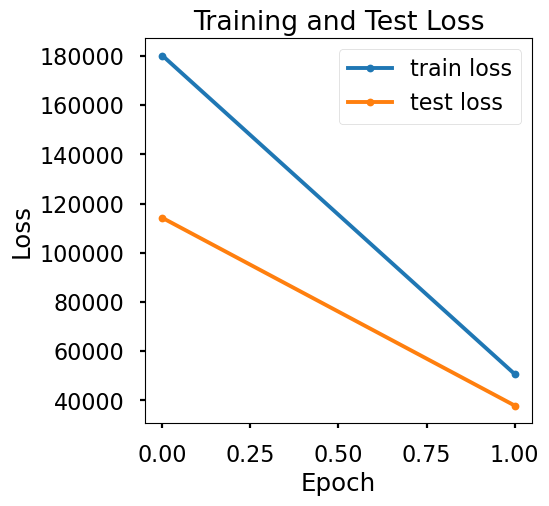

In [56]:
""" Train the model. """

# initialize list to store the losses
train_loss = []
test_loss = []

# start from a fresh model
torch.manual_seed(5889)
model_2

# loop over epochs
for epoch in range(num_epochs):
    # run a training a loop
    train_loss_tmp = train_loop(train_dl, model_2, loss_fn, optim)

    # run a testing loop
    test_loss_tmp = test_loop(train_dl, model_2, loss_fn)

    #store the loss
    train_loss.append(train_loss_tmp)
    test_loss. append(test_loss_tmp)

#plot the losses as a function of epoch
#fig, ax = plt.subplots(figsize = (5,5))
#ax.plot(x, noisy_data, '.', label='data')
#ax.plot

# plot the losses as a function of epoch
fig, ax = plt.subplots(figsize=(5,5))
epochs_range = range(len(train_loss))  # cria um range baseado no número de épocas
ax.plot(epochs_range, train_loss, '.-', label='train loss')
ax.plot(epochs_range, test_loss, '.-', label='test loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
ax.set_title('Training and Test Loss')
plt.show()